# Understanding the Definitions

In [56]:
import scipy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

**1.1. A fair coin is tossed repeatedly with results $Y_0, Y_1, Y_2, \dots$ that are 0 or 1 with probability 1/2 each. For $n \geq 1$ let $X_n = Y_n + Y_{n−1}$ be the number of 1 in the $(n − 1)$th and $n$th tosses. Is $X_n$ a Markov chain?**

No. We need to check following Markov memoryless property:   
$$P(X_{n+1}=j|X_n=i,X_{n−1}=i_{n−1},\dots,X_0=i_0) = P(X_{n+1} = j|X_n = i)=p(i,j)$$
Which in our case is clear:
$$P(X_{n+1}=j|X_n=i,X_{n−1}=i_{n−1},\dots,X_0=i_0)=P(Y_{n+1}+Y_{n}=j|Y_n+Y_{n-1}=i_n,Y_{n-1}+Y_{n-2}=i_{n-1},\dots,Y_{1}+Y_{0}=i_0)\neq P(Y_{n+1}+Y_{n}=j|Y_n+Y_{n-1}=i_n)$$
As the $X_n=Y_n+Y_{n-1}$ depends on more than one step, it could be more visible on concrete example:  
$\frac{1}{2}=P(X_3=2|X_2=1,X_1=0,X_0=0) \neq P(X_3=2|X_2=1,X_1=1,X_0=0)=0$

**1.2. Five white balls and five black balls are distributed in two urns in such a way that each urn contains five balls. At each step we draw one ball from each urn and exchange them. Let $X_n$ be the number of white balls in the left urn at time $n$. Compute the transition probability for $X_n$.**

$X_n$ can be in 6 states $\{0, 1, 2, 3, 4, 5\}$ i.e number of balls. The transitional probability matrix is
$$(p_{ij}) = \begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 \\
\frac{1}{25} & \frac{8}{25} & \frac{16}{25} & 0 & 0 & 0 \\
0 & \frac{4}{25} & \frac{12}{25} & \frac{9}{25} & 0 & 0 \\
0 & 0 & \frac{9}{25} & \frac{12}{25} & \frac{4}{25} & 0 \\
0 & 0 & 0 & \frac{16}{25} & \frac{8}{25} & \frac{1}{25} \\
0 & 0 & 0 & 0 & 1 & 0 
\end{bmatrix}$$

**1.3. We repeated roll two four sided dice with numbers $1, 2, 3,$ and $4$ on them. Let $Y_k$ be the sum on the k-th roll, $S_n = Y_1 +\dots+Y_n$ be the total of the first n rolls, and $X_n = S_n\ (mod\ 6)$. Find the transition probability for $X_n$.**

$S_n$ can be in 6 states $\{0, 1, 2, 3, 4, 5\}$ i.e $(mod\ 6)$. Helpful step is to figure out which dice outcome lead to each reminder:
- $0\ (mod\ 6)$: |{(3,3), (4,2), (2,4)}| = 3 
- $1\ (mod\ 6)$: |{(4,3), (3,4)}| = 2
- $2\ (mod\ 6)$: |{(1,1), (4,4)}| = 2
- $3\ (mod\ 6)$: |{(1,2),(2,1)}| = 2  
- $4\ (mod\ 6)$: |{(2,2), (1,3), (3,1)}| = 3
- $5\ (mod\ 6)$: |{(1,4), (4,1), (2, 3), (3,2)}| = 4 

The transitional probability matrix is
$$(p_{ij}) = \frac{1}{16}\begin{bmatrix}
3 & 2 & 2 & 2 & 3 & 4 \\
4 & 3 & 2 & 2 & 2 & 3 \\
3 & 4 & 3 & 2 & 2 & 2 \\
2 & 3 & 4 & 3 & 2 & 2 \\
2 & 2 & 3 & 4 & 3 & 2 \\
2 & 2 & 2 & 3 & 4 & 3 
\end{bmatrix}$$

**1.4. The 1990 census showed that 36% of the households in the District of Columbia were homeowners while the remainder were renters. During the next decade 6% of the homeowners became renters and 12% of the renters became homeowners. What percentage were homeowners in 2000? in 2010?**

In [12]:
init_state = np.array([.36, .64])
p_matrix = np.array([
    [.94, .06],
    [.12, .88]
])

print(fr"Homeowners in 2000s: {np.round(np.dot(init_state, p_matrix)[0], 4)}")
print(fr"Homeowners in 2010s: {np.round(np.dot(init_state, np.dot(p_matrix, p_matrix))[0], 4)}")

Homeowners in 2000s: 0.4152
Homeowners in 2010s: 0.4605


**1.5. Consider a gambler’s ruin chain with $N = 4$. That is, if $1 \leq i \leq 3$, $p(i, i + 1) = 0.4$, and $p(i, i − 1) = 0.6$, but the endpoints are absorbing states: $p(0, 0) = 1$ and $p(4, 4) = 1$ Compute $p^3(1, 4)$ and $p^3(1, 0)$.**

In [30]:
p_matrix = np.array([
    [1, 0, 0, 0, 0],
    [.6, 0, .4, 0, 0],
    [0, .6, 0, .4, 0],
    [0, 0, .6, 0, .4],
    [0, 0, 0, 0, 1]
])

print(fr"p^3(1,4)={np.round(np.linalg.matrix_power(p_matrix, 3)[1, 4], 4)}")
print(fr"p^3(1,0)={np.round(np.linalg.matrix_power(p_matrix, 3)[1, 0], 4)}")

p^3(1,4)=0.064
p^3(1,0)=0.744


**1.6. A taxicab driver moves between the airport A and two hotels B and C according to the following rules. If he is at the airport, he will be at one of the two hotels next with equal probability. If at a hotel then he returns to the airport with probability 3/4 and goes to the other hotel with probability 1/4. (a) Find the transition matrix for the chain. (b) Suppose the driver begins at the airport at time 0. Find the probability for each of his three possible locations at time 2 and the probability he is at hotel B at time 3.**

In [41]:
init_state = np.array([1, 0, 0])
p_matrix = np.array([
    [0, .5, .5],
    [.75, 0, .25],
    [.75, .25, 0],
])
print(f"(a) transition matrix for the chain\n {p_matrix}\n")

print(f"(b) t=2 {np.round(np.dot(init_state, np.linalg.matrix_power(p_matrix, 2)), 4)}")
print(f"    P(being at hotel B at t=3)={np.round(np.dot(init_state, np.linalg.matrix_power(p_matrix, 3))[1], 4)}")

(a) transition matrix for the chain
 [[0.   0.5  0.5 ]
 [0.75 0.   0.25]
 [0.75 0.25 0.  ]]

(b) t=2 [0.75  0.125 0.125]
    P(being at hotel B at t=3)=0.4062


**1.7. Suppose that the probability it rains today is 0.3 if neither of the last two days was rainy, but 0.6 if at least one of the last two days was rainy. Let the weather on day $n$, $W_n$, be R for rain, or S for sun. $W_n$ is not a Markov chain, but the weather for the last two days $X_n = (W_{n−1} , W_n)$ is a Markov chain with four states {RR, RS, SR, SS}.   
(a) Compute its transition probability.  
(b) Compute the two-step transition probability.  
(c) What is the probability it will rain on Wednesday given that it did not rain on Sunday or Monday.**

In [54]:
p_matrix = np.array([
    [.6, .4, 0, 0],  
    [0, 0, .6, .4],
    [.6, .4, 0, 0],
    [0, 0, .3, .7]
])
p_squared = np.round(np.linalg.matrix_power(p_matrix, 2), 4)
no_rain = np.dot(np.array([0, 0, 0, 1]), p_squared)

print(f"(a) Transition probability:\n {p_matrix}\n")
print(f"(b) Two-step transition probability\n {p_squared}\n")
print(f"(c) probability it will rain on Wednesday given that it did not rain on Sunday or Monday: {np.sum([no_rain[0], no_rain[2]])}\n")

(a) Transition probability:
 [[0.6 0.4 0.  0. ]
 [0.  0.  0.6 0.4]
 [0.6 0.4 0.  0. ]
 [0.  0.  0.3 0.7]]

(b) Two-step transition probability
 [[0.36 0.24 0.24 0.16]
 [0.36 0.24 0.12 0.28]
 [0.36 0.24 0.24 0.16]
 [0.18 0.12 0.21 0.49]]

(c) probability it will rain on Wednesday given that it did not rain on Sunday or Monday: 0.39



**1.8. Consider the following transition matrices. Identify the transient and recurrent states, and the irreducible closed sets in the Markov chains. Give reasons for your answers.**

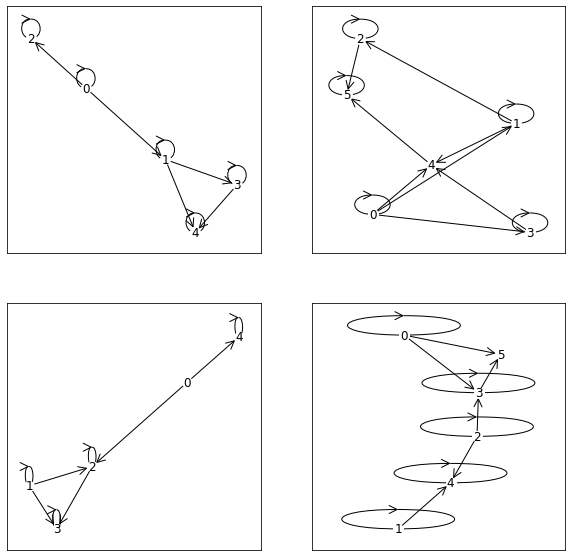

In [80]:
a = np.array([
    [.4, .3, .3, 0, 0],
    [0, .5, 0, .5, 0],
    [.5, 0, .5, 0, 0],
    [0, .5, 0, .5, 0],
    [0, .3, 0, .3, .4]
])

b = np.array([
    [.1, 0, 0, .4, .5, 0],
    [.1, .2, .2, 0, .5, 0],
    [0, .1, .3, 0, 0, .6],
    [.1, 0, 0, .9, 0, 0],
    [0, 0, 0, .4, 0, .6],
    [0, 0, 0, 0, .5, .5]
])

c = np.array([
    [0, 0, 0, 0, 1],
    [0, .2, 0, .8, 0],
    [.1, .2, .3, .4, 0],
    [0, .6, 0, .4, 0],
    [.3, 0, 0, 0, .7]
])

d = np.array([
    [.8, 0, 0, .2, 0, 0],
    [0, .5, 0, 0, .5, 0],
    [0, 0, .3, .4, .3, 0],
    [.1, 0, 0, .9, 0, 0],
    [0, .2, 0, 0, .8, 0],
    [.7, 0, 0, .3, 0, 0]
])

options = {
    'node_color': 'white',
    'node_size': 100,
    'width': 1,
    'arrowstyle': '->',
    'arrowsize': 20,
}

graph_a = nx.from_numpy_matrix(a)
graph_b = nx.from_numpy_matrix(b)
graph_c = nx.from_numpy_matrix(c)
graph_d = nx.from_numpy_matrix(d)

plt.figure(figsize=(10, 10))
plt.subplot(221)
nx.draw_networkx(graph_a, arrows=True, **options)
plt.subplot(222)
nx.draw_networkx(graph_b, arrows=True, **options)
plt.subplot(223)
nx.draw_networkx(graph_c, arrows=True, **options)
plt.subplot(224)
nx.draw_networkx(graph_d, arrows=True, **options)
plt.draw()

Graph A: 
 - transient states: {0, 1, 3}
 - recurrent states: {4, 2}
 - irreducible closed sets: {4} and {2} 
 
Graph B: 
 - transient states: {0, 1, 2, 3, 4}
 - recurrent states: {5}
 - irreducible closed sets: {5}

Graph C: 
 - transient states: {0, 1, 2}
 - recurrent states: {4, 3}
 - irreducible closed sets: {4} and {3}
 
Graph D: 
 - transient states: {0, 1, 2, 3}
 - recurrent states: {5, 4}
 - irreducible closed sets: {5} and {4}

**1.9 Find the stationary distributions for the Markov chains with transition matrices:**
$$\begin{bmatrix}
0.5 & 0.4 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.1 & 0.3 & 0.6 
\end{bmatrix};
\begin{bmatrix}
0.5 & 0.4 & 0.1 \\
0.3 & 0.4 & 0.3 \\
0.2 & 0.2 & 0.6 
\end{bmatrix};
\begin{bmatrix}
0.6 & 0.4 & 0  \\
0.2 & 0.4 & 0.2 \\
0 & 0.2 & 0.8 
\end{bmatrix}$$

In [195]:
a = np.array([
    [.5, .4, .1],
    [.2, .5, .3],
    [.1, .3, .6]
])
v_a = np.linalg.eig(a.T)[1][:,0] / np.sum(np.linalg.eig(a.T)[1][:,0])
print(f"(a) Stationary distributions {v_a}")

b = np.array([
    [.5, .4, .1],
    [.3, .4, .3],
    [.2, .2, .6],
])
v_b = np.linalg.eig(b.T)[1][:,0] / np.sum(np.linalg.eig(b.T)[1][:,0])
print(f"(b) Stationary distributions {v_b}")

c = np.array([
    [.6, .4, 0],
    [.2, .4, .2],
    [0, .2, .8]
])
c_3rd = np.array([
    [-.4, .4, 1],
    [.2, -.6, 1],
    [0, .2, 1]
])
v_c = np.linalg.inv(c_3rd)[2]
print(f"(c) Stationary distributions {v_c}")

(a) Stationary distributions [0.23404255 0.40425532 0.36170213]
(b) Stationary distributions [0.33333333 0.33333333 0.33333333]
(c) Stationary distributions [0.14285714 0.28571429 0.57142857]


(a) Matrix has eigenvalue $\lambda=1$ and positive eigenvector, if scale to $\pi_1+\pi_2+\pi_3=1$ it is the stationary distribution
(b) Matrix has eigenvalue $\lambda=1$ and positive eigenvector, if scale to $\pi_1+\pi_2+\pi_3=1$ it is the stationary distribution, easier solution the matrix is _doubly stochastic_ i.e. both rows and columns sums to 1, therefore, $\pi_i = \frac{1}{n}$
(c) However, eigenvalues and eigenvectors don't sum up nicely we can use another trick explained in ESP on pages 24-25.

$$\begin{bmatrix}
  0.6 & 0.4 & 0.\\
  0.2 & 0.4 & 0.2\\
  0. & 0.2 & 0.8\\
\end{bmatrix}\sim\begin{bmatrix}
  -0.4 & 0.4 & 1.\\
  0.2 & -0.6 & 1.\\
  0. & 0.2 & 1.\\
\end{bmatrix}; 
A = \begin{bmatrix}
  -0.4 & 0.4 & 1.\\
  0.2 & -0.6 & 1.\\
  0. & 0.2 & 1.\\
\end{bmatrix}$$
By $\pi=(0,0,1)A^{-1}$ we get the answer.

**1.10. Find the stationary distributions for the Markov chains on {1,2,3,4} with transition matrices:**
$$A=\begin{bmatrix}
  0.7 & 0. & 0.3 & 0.\\
  0.6 & 0. & 0.4 & 0.\\
  0. & 0.5 & 0. & 0.5\\
  0. & 0.4 & 0. & 0.6\\
\end{bmatrix}
B = \begin{bmatrix}
  7. & 0.3 & 0. & 0.\\
  0.2 & 0.5 & 0.3 & 0.\\
  0. & 0.3 & 0.6 & 0.1\\
  0. & 0. & 0.2 & 0.8\\
\end{bmatrix}
C = \begin{bmatrix}
  0.7 & 0. & 0.3 & 0.\\
  0.2 & 0.5 & 0.3 & 0.\\
  0.1 & 0.2 & 0.4 & 0.3\\
  0. & 0.4 & 0. & 0.6\\
\end{bmatrix}$$

In [212]:
a = np.array([
    [.7, 0, .3, 0],
    [.6, 0, .4, 0],
    [0, .5, 0, .5],
    [0, .4, 0, .6]
])
v_a = np.linalg.eig(a.T)[1][:,0] / np.sum(np.linalg.eig(a.T)[1][:,0])
print(f"(a) Stationary distributions {v_a}")
b = np.array([
    [.7, .3, 0, 0],
    [.2, .5, .3, 0],
    [.0, .3, .6, .1],
    [0, 0, .2, .8],
])
v_b = np.linalg.eig(b.T)[1][:,2] / np.sum(np.linalg.eig(b.T)[1][:,2])
print(f"(b) Stationary distributions {v_b}")
c = np.array([
    [.7, 0, .3, 0],
    [.2, .5, .3, 0],
    [.1, .2, .4, .3],
    [0, .4, 0, .6],
])
v_c = np.ones(4)/4
print(f"(c) Stationary distributions {v_c}")

(a) Stationary distributions [0.38095238 0.19047619 0.19047619 0.23809524]
(b) Stationary distributions [0.21052632 0.31578947 0.31578947 0.15789474]
(c) Stationary distributions [0.25 0.25 0.25 0.25]


(a) and (b) has eigenvalue $\lambda=1$ so we can used scaled eigenvector. (c) is doubly stochastic. so $\pi_i=\frac{1}{4}$

**1.12.  
$\ \ $(a) Find the stationary distribution for the transition probability
$$A = \begin{bmatrix}
  0 & 2/3 & 0 & 1/3\\
  1/3 & 0 & 2/3 & 0\\
  0 & 1/6 & 0 & 5/6\\
  2/5 & 0 & 3/5 & 0\\
\end{bmatrix}$$
and show that it does not satisfy the detailed balance condition (1.11).  
$\ \ $(b) Consider
$$B = \begin{bmatrix}
  0. & 1-a & 0. & a\\
  1-b & 0. & b & 0.\\
  0. & 1-c & 0. & c\\
  d & 0. & 1-d & 0.\\
\end{bmatrix}$$
and show that there is a stationary distribution satisfying (1.11) if $0 < abcd = (1 − a)(1 − b)(1 − c)(1 − d)$.**

In [255]:
a = np.array([
    [0, 2/3, 0, 1/3],
    [1/3, 0, 2/3, 0],
    [0, 1/6, 0, 5/6],
    [2/5, 0, 3/5, 0]
])
# Using the same trick as 𝜋=(0,0,0,1)𝐴−1
v_a = np.array([0.18817204, 0.17741936, 0.31182796, 0.32258064])
print(f"(a) Stationary distribution: {v_a}")
aa = bb = cc = dd = 0.5
b = np.array([
    [0, aa, 0, 1 - aa],
    [1 - bb, 0, bb, 0],
    [0, 1 - cc, 0, cc],
    [dd, 0, 1  - dd, 0]
])

(a) Stationary distribution: [0.18817204 0.17741936 0.31182796 0.32258064]


(a) From the definition, stationary distribution is _detailed balance_ when $\pi(x)p(x, y)=\pi(y)p(y, x), \forall x, y$.   
In this case $35\frac{2}{3}=\pi(1)p(1,2)\neq\pi(2)p(2,1)=33\frac{1}{3}$   
(b) From $B$ we get following relations:  
$\pi_1 + \pi_3 = \pi_2 + \pi_4$  
$\pi_1 + \pi_2 + \pi_3 + \pi_4 = 1$  
combining them, we get  
$\pi_1 + \pi_3=\frac{1}{2}=\pi_2 + \pi_4$

To check the definition we need to satisfy those equations:  
$\pi_1 a = \pi_2 (1-b)$    
$\pi_2 b = \pi_3 (1-c)$  
$\pi_3 c = \pi_4 (1-d)$  
$\pi_4 d = \pi_1 (1-a)$  
Combining them all together we get:  
$\pi_1 = \pi_1\frac{(1-a)(1-b)(1-c)(1-d)}{abcd}$ which for $\pi_1 \neq 0$ is $abcd=(1-a)(1-b)(1-c)(1-d)$  
If $\pi_1=0$, then $(1-b)\pi_2+d\pi_4=0$ therefore $(1-b)$ or $d < 0$ or $\pi_2$ or  $\pi_4 < 0$, which violets the definition of $\pi$ or $abcd>0$